In [1]:
import os
import zipfile 
import tensorflow as tf
# os.getcwd()   # get current working dir 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O validation-horse-or-human.zip

In [ ]:
# Reading and extracting zip file 
local_zip = ''
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [2]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_path = 'horse-or-human/train/'
val_path = 'horse-or-human/validation/'



# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip = True,
      fill_mode= 'nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        val_path,  # This is the source directory for validation images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch = 8,  
      epochs = 30,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = 8)

Epoch 1/30
8/8 [==============================] - 22s 1s/step - loss: 0.6905 - accuracy: 0.5195 - val_loss: 0.6829 - val_accuracy: 0.5273
Epoch 2/30
8/8 [==============================] - 12s 1s/step - loss: 0.6848 - accuracy: 0.5986 - val_loss: 0.6770 - val_accuracy: 0.5195
Epoch 3/30
8/8 [==============================] - 11s 1s/step - loss: 0.6804 - accuracy: 0.5806 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 11s 1s/step - loss: 0.6800 - accuracy: 0.5417 - val_loss: 0.6767 - val_accuracy: 0.5195
Epoch 5/30
8/8 [==============================] - 11s 1s/step - loss: 0.6684 - accuracy: 0.5806 - val_loss: 0.6698 - val_accuracy: 0.6094
Epoch 6/30
8/8 [==============================] - 11s 1s/step - loss: 0.6669 - accuracy: 0.6251 - val_loss: 0.6724 - val_accuracy: 0.5000
Epoch 7/30
8/8 [==============================] - 11s 1s/step - loss: 0.6637 - accuracy: 0.6296 - val_loss: 0.6713 - val_accuracy: 0.5000
Epoch 8/30
8/8 [==================

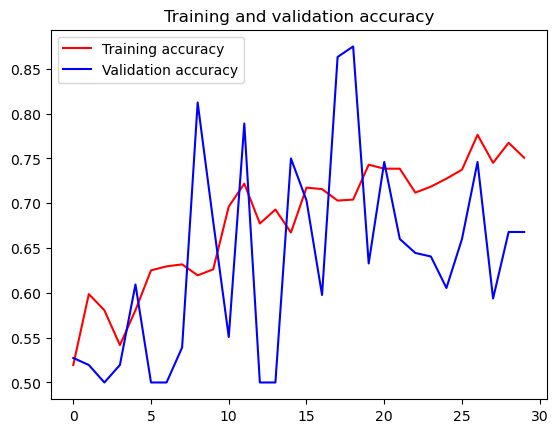

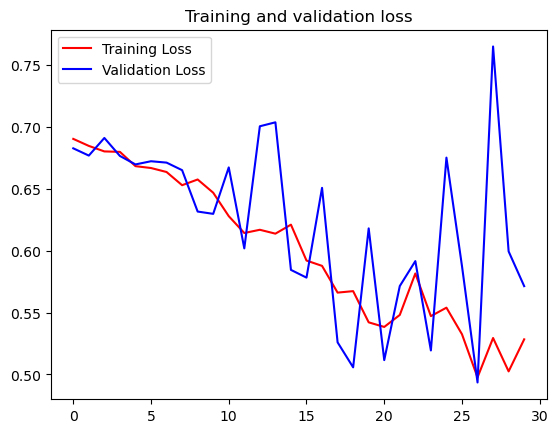

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Results : despite of image augmentation, the diversity of the images is sparse and it is possible the validation set is poorly designd in a way that the images are very similar to thr training set. As a result if we change the images in the training set, it has negative effect on val set . Data augmentation adds some randomness to the training data and if the test data does not the same randomness, the results fluctuate like this 

# Running model without data augmentation 

In [12]:
def train_model(): 
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    from tensorflow.keras.optimizers import RMSprop
    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])
    

    
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(rescale=1./255)

    validation_datagen = ImageDataGenerator(rescale=1./255)

    
    # Flow training images in batches of 128 using train_datagen generator

    train_path = 'horse-or-human/train/'
    val_path = 'horse-or-human/validation/'
    train_generator = train_datagen.flow_from_directory(
    train_path,  # This is the source directory for training images
    target_size = (150, 150),  # All images will be resized to 150x150
    batch_size = 128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary')

    # Flow training images in batches of 128 using train_datagen generator
    validation_generator = validation_datagen.flow_from_directory(
    val_path,  # This is the source directory for training images
    target_size = (150, 150),  # All images will be resized to 150x150
    batch_size = 32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary')
    
    history = model.fit(
      train_generator,
      steps_per_epoch = 8,  
      epochs = 30,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = 8)
    return history
    

In [13]:
history = train_model()

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/30
8/8 [==============================] - 8s 802ms/step - loss: 0.6766 - accuracy: 0.5840 - val_loss: 0.6510 - val_accuracy: 0.5547
Epoch 2/30
8/8 [==============================] - 7s 773ms/step - loss: 0.6504 - accuracy: 0.6463 - val_loss: 0.6309 - val_accuracy: 0.5352
Epoch 3/30
8/8 [==============================] - 7s 775ms/step - loss: 0.6291 - accuracy: 0.7141 - val_loss: 0.5779 - val_accuracy: 0.8164
Epoch 4/30
8/8 [==============================] - 6s 872ms/step - loss: 0.5966 - accuracy: 0.8331 - val_loss: 0.5277 - val_accuracy: 0.8320
Epoch 5/30
8/8 [==============================] - 7s 773ms/step - loss: 0.5663 - accuracy: 0.8065 - val_loss: 0.4809 - val_accuracy: 0.8555
Epoch 6/30
8/8 [==============================] - 7s 771ms/step - loss: 0.5287 - accuracy: 0.8398 - val_loss: 0.4336 - val_accuracy: 0.8516
Epoch 7/30
8/8 [==============================] - 7s 798ms/step - loss: 0.496

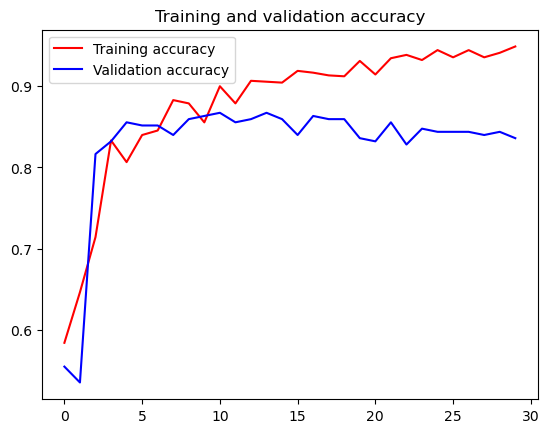

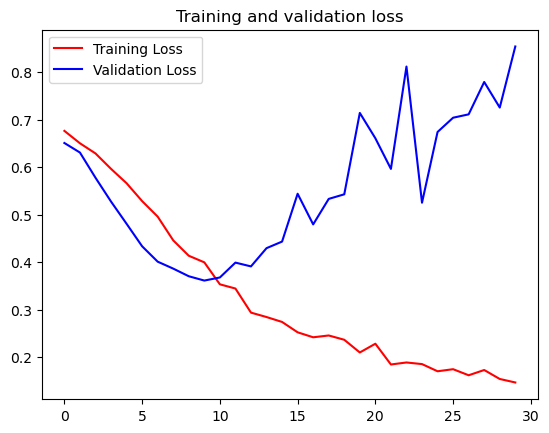

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Results : less fluctuation for val accu without augmentation 